In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_images = train_images.reshape((-1, 28, 28, 1)).astype("float32") / 255.0  #데이터 개수, 이미지크기, 흑백/컬러
test_images = test_images.reshape((-1, 28, 28, 1)).astype("float32") / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step 


In [5]:
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
model.fit(train_images, train_labels, epochs=5, verbose=2)

Epoch 1/5
1875/1875 - 3s - 2ms/step - accuracy: 0.9551 - loss: 0.1503
Epoch 2/5
1875/1875 - 3s - 2ms/step - accuracy: 0.9841 - loss: 0.0517
Epoch 3/5
1875/1875 - 3s - 1ms/step - accuracy: 0.9902 - loss: 0.0324
Epoch 4/5
1875/1875 - 3s - 1ms/step - accuracy: 0.9932 - loss: 0.0219
Epoch 5/5
1875/1875 - 3s - 1ms/step - accuracy: 0.9954 - loss: 0.0142


In [8]:
loss, accuracy = model.evaluate(test_images, test_labels)
print("accuracy:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step - accuracy: 0.9797 - loss: 0.0754
accuracy: 0.9840999841690063


In [9]:
image = test_images[8]
label = test_labels[8]
pred = model.predict(image.reshape(1, 28, 28, 1))
pred_label = np.argmax(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


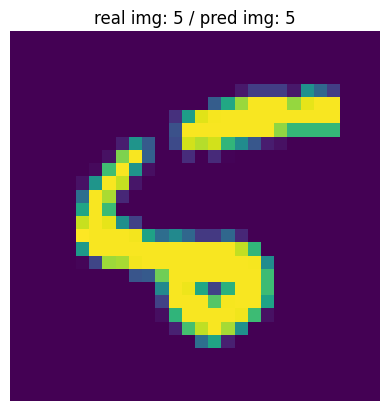

In [11]:
plt.imshow(image.reshape(28, 28))
plt.title(f"real img: {label} / pred img: {pred_label}")
plt.axis('off')
plt.show()